<a href="https://colab.research.google.com/github/jacobpad/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123A_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

# Part 1

In [1]:
# Set the variables 

# True positive
true_positive = 1 # Will always be 100%, or 1
# Prior probability
prior_probability = 1/1000 # Comes from the question/problem/assignment
# False pos rate
false_positive_rate= .08 # Comes from the question/problem/assignment
# Compliment probability
compliment_probability = 1 - prior_probability # 999/1000 

print('Variables set according to the question above.')

Variables set according to the question above.


In [2]:
# Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  count = 0
  while(count < 1):
    count+=1
    compliment_probability = 1 - prob_drunk_prior  
    prob_drunk_prior = (true_positive_rate * prob_drunk_prior) / ((true_positive_rate * prob_drunk_prior) + (false_positive_rate * compliment_probability))
  print('Runs',count,'times')
  return(print('What is the probability that a person is drunk after one positive breathalyzer test?\nThe probability is:', prob_drunk_prior,'\nOr',prob_drunk_prior*100,'%'))  

prob_drunk_given_positive(prior_probability, false_positive_rate, true_positive)

Runs 1 times
What is the probability that a person is drunk after one positive breathalyzer test?
The probability is: 0.012357884330202669 
Or 1.2357884330202669 %


In [3]:
# Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  count = 0
  while(count < 2):
    count+=1
    compliment_probability = 1 - prob_drunk_prior
    prob_drunk_prior = (true_positive_rate * prob_drunk_prior) / ((true_positive_rate * prob_drunk_prior) + (false_positive_rate * compliment_probability))
  print('Runs',count,'times')
  return(print('What is the probability that a person is drunk after two positive breathalyzer tests?\nThe probability is:', prob_drunk_prior,'\nOr',prob_drunk_prior*100,'%'))

prob_drunk_given_positive(prior_probability, false_positive_rate, true_positive)

Runs 2 times
What is the probability that a person is drunk after two positive breathalyzer tests?
The probability is: 0.13525210993291495 
Or 13.525210993291495 %


In [4]:

# Function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  count = 0
  while(count < 4):
    count+=1
    compliment_probability = 1 - prob_drunk_prior
    prob_drunk_prior = (true_positive_rate * prob_drunk_prior) / ((true_positive_rate * prob_drunk_prior) + (false_positive_rate * compliment_probability))
  print('Runs',count,'times')
  return(print('How many positive breathalyzer tests are needed in order to have a probability that\'s \ngreater than 95% that a person is drunk beyond the legal limit?', prob_drunk_prior,'\nOr',prob_drunk_prior*100,'%'))

prob_drunk_given_positive(prior_probability, false_positive_rate, true_positive)

Runs 4 times
How many positive breathalyzer tests are needed in order to have a probability that's 
greater than 95% that a person is drunk beyond the legal limit? 0.9606895076105054 
Or 96.06895076105054 %


# Part 2

In [13]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
# lets start by importing with !wget
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

column_headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']

# turn it into a df and fix it up really quick
df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

# make em numeric (y:1, n:0)
df = df.replace({'y':1, 'n':0})

# split em into parties
rep = df[df['party'] == 'republican'].drop('party', axis=1) #[column_headers.remove('party')]
dem = df[df['party'] == 'democrat'].drop('party', axis=1) #[column_headers.remove('party')]

# now lets look
print(rep.head(2))
print(dem.head(2))
print(df.head(4))

--2020-01-23 04:00:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.12’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-01-23 04:00:19 (278 KB/s) - ‘house-votes-84.data.12’ saved [18171/18171]

   handicapped-infants  water-project  budget  ...  crime  duty-free  south-africa
0                  0.0            1.0     0.0  ...    1.0        0.0           1.0
1                  0.0            1.0     0.0  ...    1.0        0.0           NaN

[2 rows x 16 columns]
   handicapped-infants  water-project  budget  ...  crime  duty-free  south-africa
2                  NaN            1.0     1.0  ...    1.0        0.0         

In [0]:
# Columns
education = rep['education'].dropna()

In [0]:
# ########## Visualization comparing the results of a Bayesian approach
def confidence_interval(data, confidence = .95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return(mean, mean - interval, mean + interval)

In [20]:
# Education CI
print(confidence_interval(education, .95))

# Bayesian CI
bayesian_confidence_interval, _, _ = stats.bayes_mvs(education, alpha=.95)
print(bayesian_confidence_interval)

(0.8709677419354839, 0.8176017935029393, 0.9243336903680285)
Mean(statistic=0.8709677419354839, minmax=(0.8176017935029393, 0.9243336903680285))


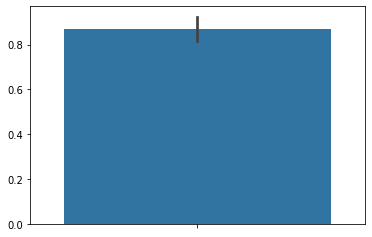

In [21]:
# sns.barplot(bayesian_confidence_interval.statistic)
sns.barplot(bayesian_confidence_interval.minmax, orient='vertical');

# Part 3 - Stretch Goal and Resources

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!